# MA2K4 Assignment 1

Student ID - 2103654 and 2161367

In [1]:
# Libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Implementing functions to compute solution to quadratic equation
def x_plus(p , q) :
    result= -p + np.sqrt(p ** 2 + q)
    return result

def x_minus(p , q) :
    result= -p - np.sqrt(p ** 2 + q)
    return result

### 1.7) a)

In [2]:
# Defining our positive relative change function
q = 1
def rPlus(p, dp):
    xPos = np.abs(x_plus(p, q))
    val = np.abs( np.abs(x_plus(p + dp, q)) - np.abs(xPos) )##
    ret = (val / xPos) / (np.abs(dp) / np.abs(p))
    return ret

# Defining our negative relative change function
def rMinus(p, dp):
    xNeg = np.abs(x_minus(p, q))
    val = np.abs( np.abs(x_minus(p + dp, q)) - np.abs(xNeg) )##
    ret = (val / xNeg) / (np.abs(dp) / np.abs(p))
    return ret

# Calculating and printing relative change
dif1Plus = rPlus(1, 1e-3)
dif1Minus = rMinus(1, 1e-3)

dif2Plus = rPlus(-1, 1e-3)
dif2Minus = rMinus(-1, 1e-3)

print(f'For p = -1, the relative change in xplus is {dif2Plus}, and xminus is {dif2Minus}.')
print(f'For p = 1 the relative change in xplus is {dif1Plus}, and xminus is {dif1Minus}.')

For p = -1, the relative change in xplus is 0.7070335212563417, and xminus is 0.7075337713501161.
For p = 1 the relative change in xplus is 0.7066802177995782, and xminus is 0.7071799678933286.


We can see that a small change in p results in a fairly small (<1) relative change of about 0.7.. This is true for both $$

### 1.7) b)

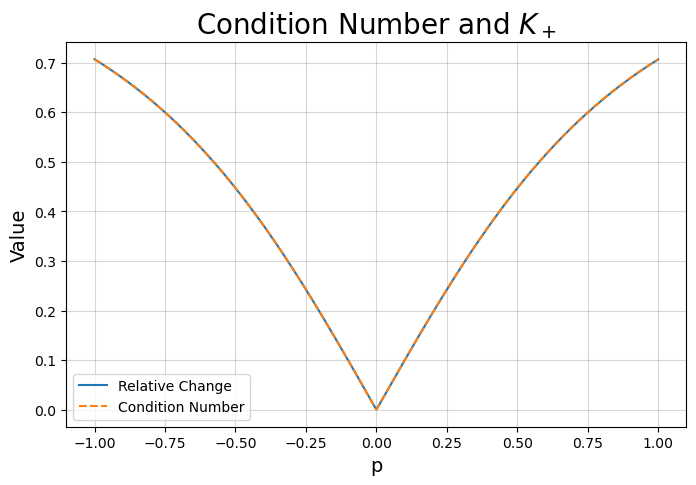

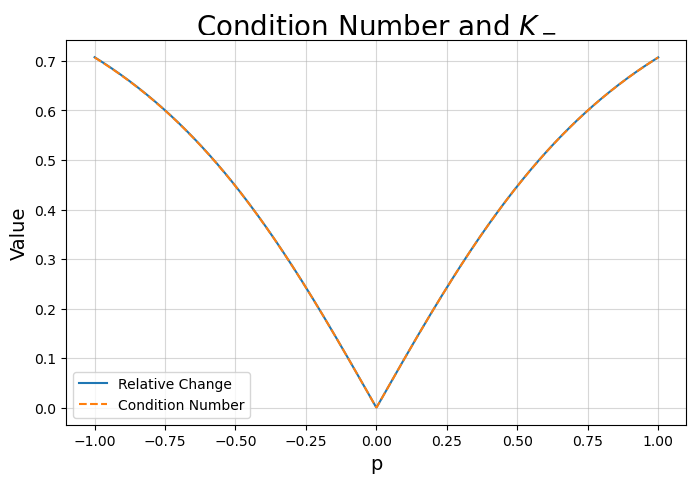

In [3]:
# Setting x and y values
xArr = np.linspace(-1, 1, 1000)
yPlus = rPlus(xArr, 1e-3)
yMinus = rMinus(xArr, 1e-3)
q = 1

# Function condition number K(p)
def cond(p, q):
    temp = np.sqrt(p ** 2 + q)
    ret = np.abs(p) / temp
    return ret

# Array to hold condition numbers
kArr = cond(xArr, q)

# Plotting graph for the R plus
plt.figure(figsize=(8,5))
plt.plot(xArr, yPlus, label = "Relative Change")
plt.plot(xArr, kArr, label='Condition Number', linestyle='dashed')

# Graph settings
plt.title("Condition Number and $K_+$", fontsize=20)
plt.xlabel("p", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend()
plt.grid(True, alpha = 0.5)
plt.show()

# Plotting graph for the R minus
plt.figure(figsize=(8,5))
plt.plot(xArr, yMinus, label = "Relative Change")
plt.plot(xArr, kArr, label='Condition Number', linestyle='dashed')

# Graph settings
plt.title("Condition Number and $K_-$", fontsize=20)
plt.xlabel("p", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend()
plt.grid(True, alpha = 0.5)
plt.show()

The relative change and condition numbers are the same for both x+ and x-. The values are symmetric about p=0 and increase as you get further away from p=0. So a small change in p leads to a small relative change and small change in condition number and vice versa for a large change in p.

### 1.7) c)

In [4]:
# Defining our positive relative change function
p = 1
def rPlus_q(q, dq):
    xPos = np.abs(x_plus(p, q))
    val = np.abs( np.abs(x_plus(p , q + dq)) - np.abs(xPos) )##
    ret = (val / xPos) / (np.abs(dq) / np.abs(q))
    return ret


# Defining our negative relative change function
def rMinus_q(q, dq):
    xNeg = np.abs(x_minus(p, q))
    val = np.abs( np.abs(x_minus(p , q + dq)) - np.abs(xNeg) )##
    ret = (val / xNeg) / (np.abs(dq) / np.abs(q))
    return ret


# Calculating and printing relative change
dif1Plus = rPlus_q(1, 1e-3)
dif1Minus = rMinus_q(1, 1e-3)

dif2Plus = rPlus_q(-1, 1e-3)
dif2Minus = rMinus_q(-1, 1e-3)

print(f'For q = -1, the relative change in xplus is {dif2Plus}, and xminus is {dif2Minus}.')
print(f'For q = 1 the relative change in xplus is {dif1Plus}, and xminus is {dif1Minus}.')

For q = -1, the relative change in xplus is 31.62277660168378, and xminus is 31.62277660168389.
For q = 1 the relative change in xplus is 0.8534467230844732, and xminus is 0.1464283081556372.


We can see that a small change in q results in a huge relative change in our solution. 
The solution is more sensitive when q=-1 since the relative change is about 30 for both xplus and xminus.
The solution is far less sensitive for q=1 since the relative change is less than 1 for both xplus and xminus.

### 1.7) d)

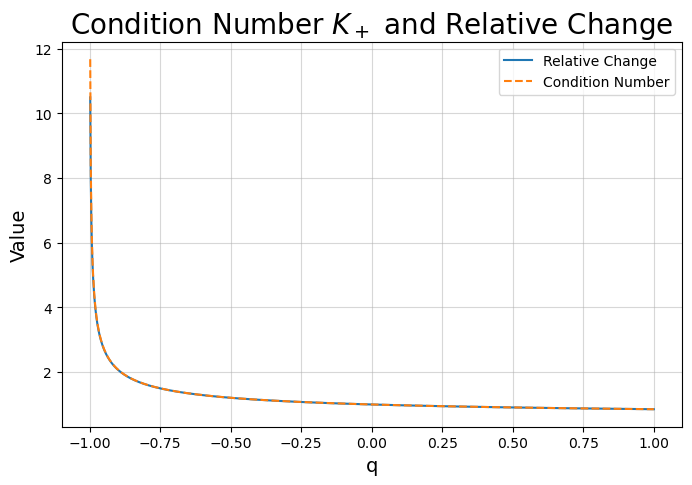

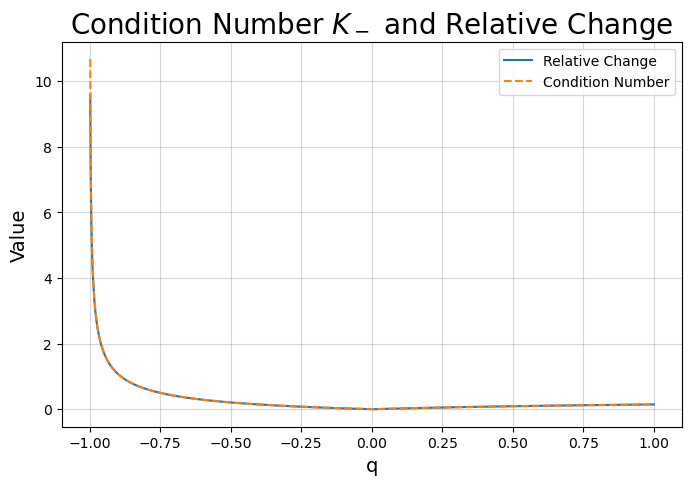

In [5]:
# Setting x and y values
xArr = np.linspace(-1, 1, 1000)
xArr = xArr[1:] # Removing q = -1
yPlus = rPlus_q(xArr, 1e-3)
yMinus = rMinus_q(xArr, 1e-3)
p = 1

# Function condition number K(p) for positive root
def cond_plus(p, q):
    temp = 2 * np.sqrt(p ** 2 + q) * np.abs((np.sqrt(p **2 + q) - p))
    ret = np.abs(q) / temp
    return ret

# condition number function for negative root
def cond_minus(p, q):
    temp = 2* np.sqrt(p ** 2 + q) * np.abs((np.sqrt(p **2 + q) + p))
    ret = np.abs(q) / temp
    return ret

# Arrays for condition number
kArr_plus = cond_plus(p, xArr)
kArr_minus = cond_minus(p, xArr)

# Plotting graph for the R plus
plt.figure(figsize = (8,5))
plt.plot(xArr, yPlus, label = "Relative Change")
plt.plot(xArr, kArr_plus, label ='Condition Number', linestyle ='dashed')

# Graph settings
plt.title("Condition Number $K_+$ and Relative Change", fontsize = 20)
plt.xlabel("q", fontsize = 14)
plt.ylabel("Value", fontsize = 14)
plt.legend()
plt.grid(True, alpha = 0.5)
plt.show()

# Plotting graph for the R minus
plt.figure(figsize = (8,5))
plt.plot(xArr, yMinus, label = "Relative Change")
plt.plot(xArr, kArr_minus, label='Condition Number', linestyle='dashed')

# Graph settings
plt.title("Condition Number $K_-$ and Relative Change", fontsize = 20)
plt.xlabel("q", fontsize = 14)
plt.ylabel("Value", fontsize = 14)
plt.legend()
plt.grid(True, alpha = 0.5)
plt.show()

$q \neq -1$ as it results in dividing by 0, thus it gets removed from our array. Both condition number and relative change grows exponentially near -1 as this is equivalent to dividing by a very small number or multiplying by a very large number. Past 0, $K_+$ and relative change continues to decrease as shown in the first plot, however $K_-$ increases as does relative change. 

### 1.8) a)

In [6]:
# Setting up linear interpolate
def linear_interpolate (f , x_0 , x_1 , x ) :
    result = f(x_0) + ((f(x_1) - f(x_0)) / (x_1 - x_0)) * (x - x_0)
    return result

# Defining our function
def func (x):
    result = 2 * np.sin(2 * x)
    return result

x_0 = 0
x_1 = 1

# Calling linear interpolate
print("The linear interpolant for nodes x0 = 0 and x1 = 1 evaluated at x = 0.75 is", linear_interpolate(func, x_0, x_1, 0.75))

The linear interpolant for nodes x0 = 0 and x1 = 1 evaluated at x = 0.75 is 1.3639461402385225


### 1.8) b)

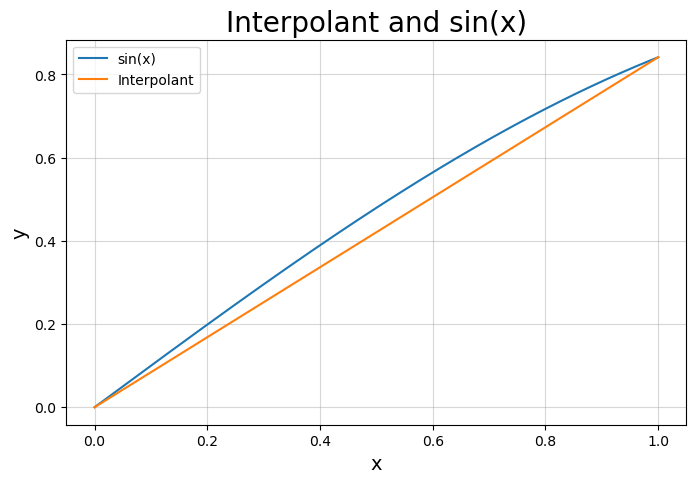

In [7]:
# Setting x values and defining new function
xVal = np.linspace(0, 1, 1000)

# sin(x) function
def sinx(x):
    return np.sin(x)

# Plotting graph for our interpolated function
plt.figure(figsize = (8, 5))
plt.plot(xVal, sinx(xVal), label = "sin(x)")
plt.plot(xVal, linear_interpolate(sinx, x_0, x_1, xVal), label = "Interpolant")

# Graph settings
plt.title("Interpolant and sin(x)", fontsize = 20)
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.legend()
plt.grid(True, alpha = 0.5)
plt.show()

The error between the linear interpolant and sin(x) is shown by the difference between the two lines. The error is smaller for x values closer to our nodes 0 and 1 and the error is never more than 0.1. The interpolant and sin(x) take the same values at the nodes.

### 1.8) c)

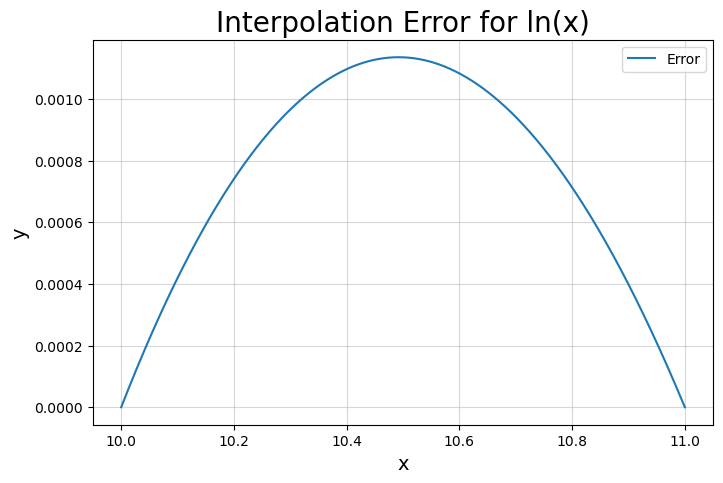

The error at x = 10.2 is 0.0007405913353144555
The error at x = 10.8 is 0.0007128972926682131


In [8]:
# Defining the interpolation error function
def interpolation_error (f , x_0 , x_1 , x ):
    actual = f(x)
    esti = linear_interpolate(f , x_0 , x_1 , x )
    result = actual - esti
    return result

# Defining ln(x)
def ln(x):
    return np.log(x)

# Initial values and set up
x_0 = 10
x_1 = 11
xval = np.linspace(10,11,1000)
yval = interpolation_error(ln, x_0, x_1, xval)

# Plotting graph for our interpolated function
plt.figure(figsize = (8, 5))
plt.plot(xval, yval, label = "Error")

# Graph settings
plt.title("Interpolation Error for ln(x)", fontsize = 20)
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.legend()
plt.grid(True, alpha = 0.5)
plt.show()

print("The error at x = 10.2 is", interpolation_error(ln, x_0, x_1, 10.2))
print("The error at x = 10.8 is", interpolation_error(ln, x_0, x_1, 10.8))

### 1.8) d) 

The maximum absolute error for f(x) = 1/(1 + x²) is 0.06744219634970638
The error values for the various h are [0.06744219634970638, 0.04183444351579646, 0.014040868129654216, 0.0038014867574330813, 0.0009699183573143033, 0.00024372383715232093, 6.100904004002761e-05, 1.5257145002389727e-05, 3.8145916398946156e-06, 9.536669980381163e-07, 2.3841794249968018e-07]


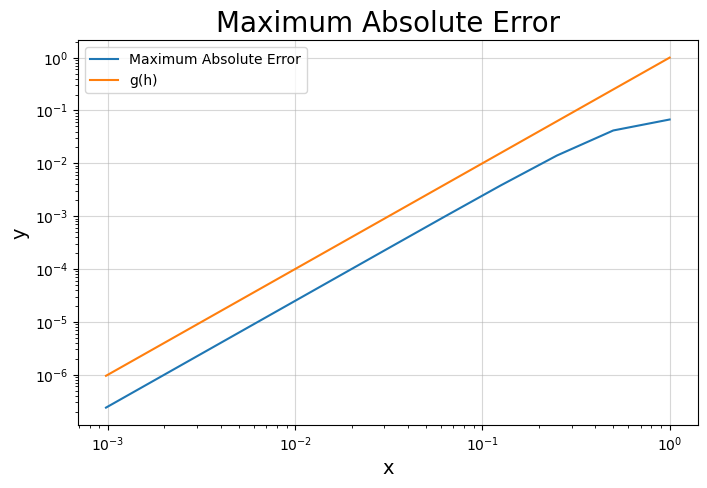

In [9]:
# Defining our given function
def f_x(x):
    return 1 / (1 + x ** 2)

# Setting initial conditions
x_0 = 0
x_1 = 1

# Defining maximum absolute error function
def max_error(f, x_0, x_1):
    xarr = np.linspace(x_0, x_1, 1000)
    err = interpolation_error(f, x_0, x_1, xarr)
    errMax = np.max(np.abs(err))
    return errMax
    
# Printing maximum absolute error
print(f"The maximum absolute error for f(x) = 1/(1 + x\u00B2) is {max_error(f_x, x_0, x_1)}")

# Compute maximum error for various h
errArr = []
for i in range(11):
    h = 2 ** -i
    result = max_error(f_x, x_0, h)
    errArr.append(result) 

print("The error values for the various h are", errArr)
xVal = np.linspace(0, 10, 11)
xVal = 2 ** -xVal

# Plotting h^gamma
gamma=2
def gfunc(h):
    return h**gamma

# Plotting graph on a log log scale
plt.figure(figsize = (8, 5))
plt.loglog(xVal, errArr, label = "Maximum Absolute Error")
plt.loglog(xVal, gfunc(xVal), label = "g(h)")

# Graph settings
plt.title("Maximum Absolute Error", fontsize = 20)
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.legend()
plt.grid(True, alpha = 0.5)
plt.show()

As we can see, the error is increasing exponentially as the log-log graph is linear, however we can see that close to x = 1, it becomes less steep. This indicates a smaller maximum absolute error.
We obtain $\gamma=2$ which means the scaling of the error is exponential however there is a proportional error factor. We have quadratic convergence. 

### 1.9) a)

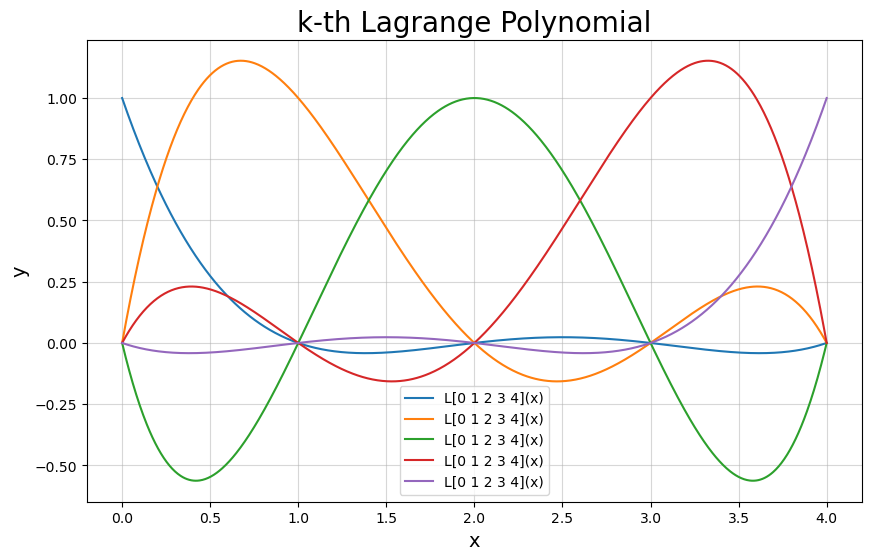

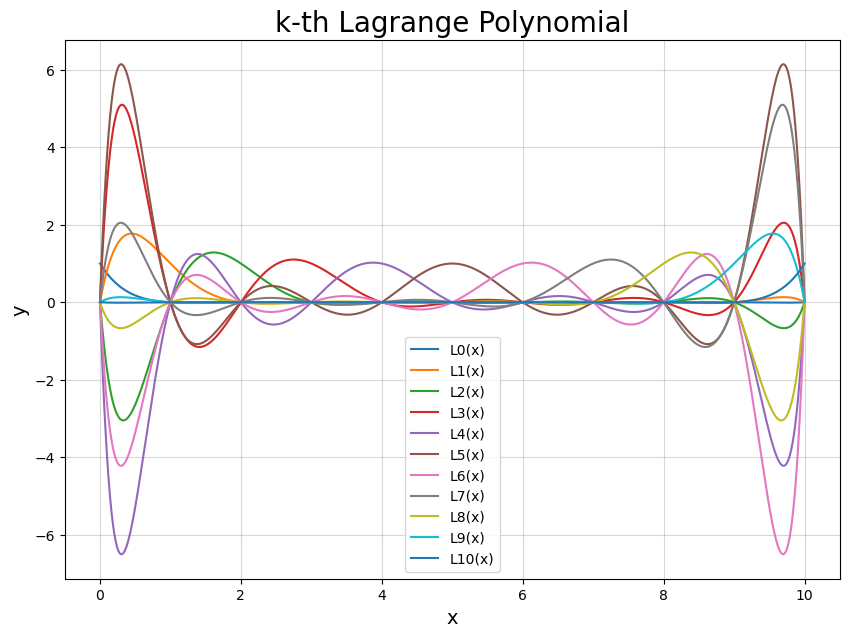

In [10]:
def lagrange (k , x , nodes ):
    m = len(nodes)

    # Lagrange polynomial formula
    L_k = np.prod([(x - nodes[j]) / (nodes[k] - nodes[j]) for j in range(m) if j != k], axis=0)

    return L_k

node = np.arange(5)
k = np.arange(5)
xvals = np.linspace(0, 4, 1000)

# Plotting the 5 Lagrange polynomials
plt.figure(figsize=(10, 6))
for i in k:
    plt.plot(xvals, lagrange(i, xvals, node), label=f'L{k}(x)')
    
# Graph settings
plt.title("k-th Lagrange Polynomial", fontsize = 20)
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.legend()
plt.grid(True, alpha = 0.5)
plt.show()

# Plotting the 11 Lagrange polynomials
node2 = np.arange(11)
k = np.arange(11)
xvals2 = np.linspace(0, 10, 1000)

plt.figure(figsize=(10, 7))
for i in k:
    plt.plot(xvals2, lagrange(i, xvals2, node2), label=f'L{i}(x)')


# Graph settings
plt.title("k-th Lagrange Polynomial", fontsize = 20)
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.legend()
leg = plt.legend( loc = 'lower center')
plt.grid(True, alpha = 0.5)
plt.show()

### 1.9) b)

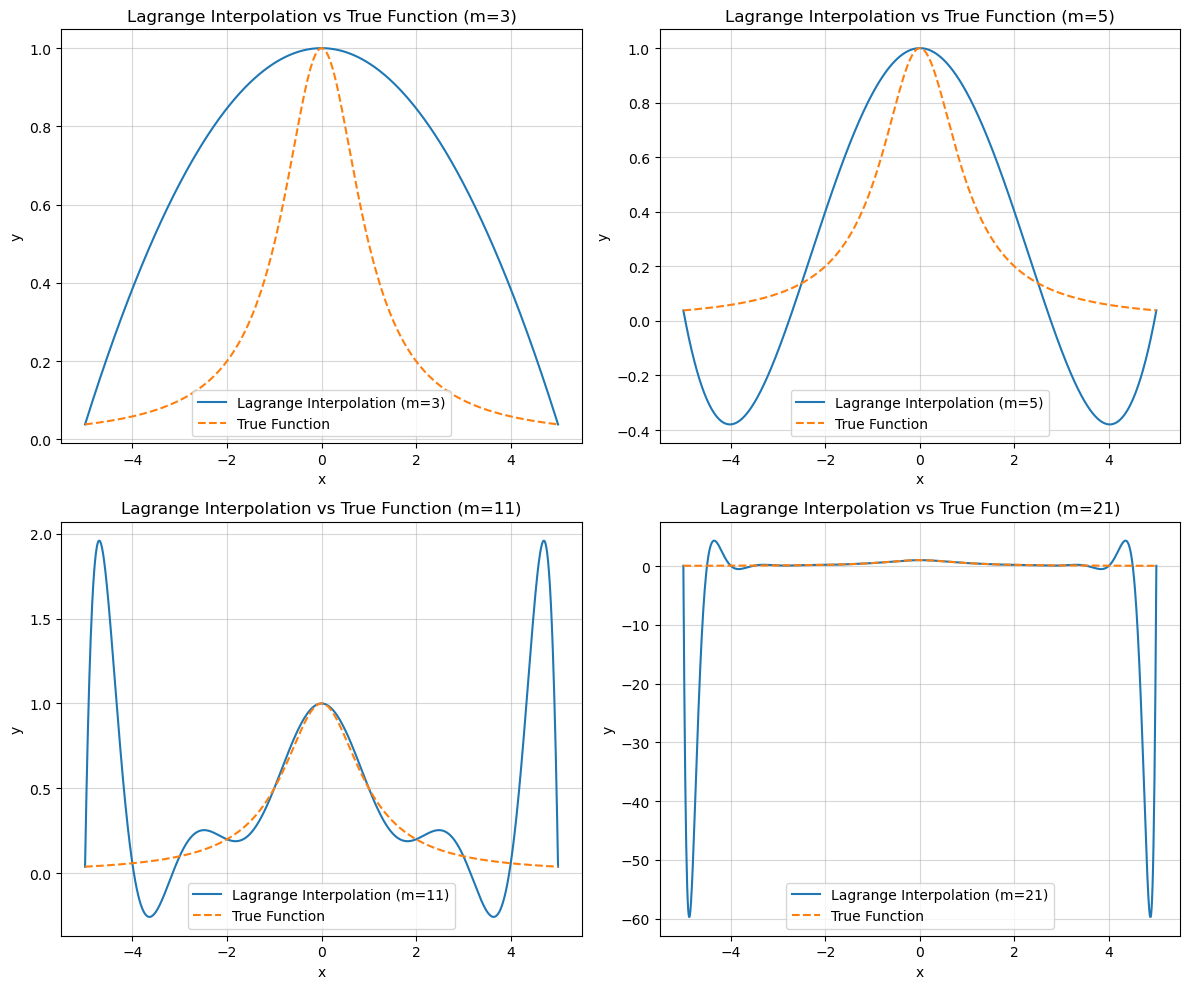

In [11]:
# Defining Lagrange interpolation function
def lagrange_interp(x, nodes, values):
    m = len(nodes)
    result = np.sum(np.array([values[k] * lagrange(k, x, nodes) for k in range(m)]), axis=0)
    return result

# Values for m
m_vals=[3,5,11,21]

#creates m equally spaced nodes
for i in m_vals:
    nodes = np.linspace(-5,5,i)

# Defining f(x)
def myfunc(x):
    return 1/(1+x**2)

# Setting up x values 
xvals=np.linspace(-5,5,1000)
plt.figure(figsize=(12, 10))

# Plotting over m values
for i, m in enumerate(m_vals, 1):
    nodes = np.linspace(-5, 5, m)
    values = myfunc(nodes)

    # Plot Lagrange interpolation
    plt.subplot(2, 2, i)
    plt.plot(xvals, lagrange_interp(xvals, nodes, values), label=f'Lagrange Interpolation (m={m})')

    # Plot true function for comparison
    plt.plot(xvals, myfunc(xvals), label='True Function', linestyle='--')

    # Graph settings
    plt.title(f'Lagrange Interpolation vs True Function (m={m})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

We observe that increasing the number of nodes results in the Lagrange interpolating polynomial exhibiting stronger and stronger oscillations towards the edge of the interval. The interpolation error becomes large as we increase m. 

This is known as the Runge phenomenon.

### 1.9) b) continued

In [12]:
# x values to consider
x_eval = [1, 4.5]

# m values from earlier
m_vals = [3, 5, 11, 21]

# Calculating the interpolant values and true values
for m in m_vals:
    nodes = np.linspace(-5, 5, m)
    values = myfunc(nodes)

    interpolant_values = lagrange_interp(np.array(x_eval), nodes, values)
    print(f"For m={m}:")
    for x_val, interp_val in zip(x_eval, interpolant_values):
        true_val = myfunc(x_val)
        print(f"At x={x_val}, Interpolant Value: {interp_val}, True Value: {true_val}")
    print('')

For m=3:
At x=1, Interpolant Value: 0.9615384615384615, True Value: 0.5
At x=4.5, Interpolant Value: 0.22115384615384615, True Value: 0.047058823529411764

For m=5:
At x=1, Interpolant Value: 0.8342175066312998, True Value: 0.5
At x=4.5, Interpolant Value: -0.2891246684350133, True Value: 0.047058823529411764

For m=11:
At x=1, Interpolant Value: 0.5, True Value: 0.5
At x=4.5, Interpolant Value: 1.578720990349265, True Value: 0.047058823529411764

For m=21:
At x=1, Interpolant Value: 0.5, True Value: 0.5
At x=4.5, Interpolant Value: 0.047058823529411764, True Value: 0.047058823529411764



### Observations
The interpolant value at x=1 is the same as the true value for large m. At x=4.5, the difference between the interpolant value and true value increases as we increase m from 3 to 5 to 11. However, at m=21, the interpolant value matches the true value of 0.0471 (3 d.p.).

The results at x=1 and x=4.5 agree with the Weierstrass theorem. This is because increasing the degree of our linear interpolant has improved our ability to approximate f(x) at x=1 and x=4.5. Though it is worthwhile to mention the maximum absolute has also increased with m so perhaps we should consider a different set of nodes (perhaps Chebyshev nodes!).

p.s. i did my 2nd year essay on Chebyshev nodes which is why I know about them :)